In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train=pd.read_csv('/Users/chinararora/Documents/My Projects/Sentiment Analysis/train.tsv',sep='\t')
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
test=pd.read_csv('/Users/chinararora/Documents/My Projects/Sentiment Analysis/test.tsv',sep='\t')
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


##### Phrases are taken from reviews and assigned sentiment labels. Phrases that are common for multiple reviews are not repeated

In [5]:
train[train['SentenceId']==1]

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [6]:
train['Phrase'][0]

'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'

#### Majority of phrases have a neutral sentiment

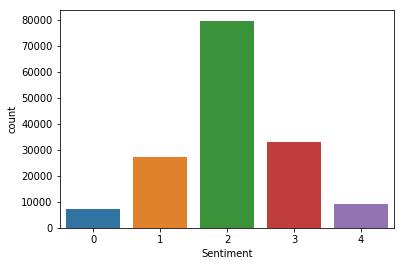

In [7]:
sns.countplot(x='Sentiment',data=train)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [10]:
svc_model=LinearSVC(C=1.0,
                   class_weight='balanced',
                   loss='squared_hinge',
                   max_iter=1000,
                   penalty='l2',
                   random_state=0)

tfidf=TfidfVectorizer(input='content',
    encoding='utf-8',
    decode_error='strict',
    stop_words="english",
    token_pattern=r"(?u)\b\w\w+\b",
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1)

In [11]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [12]:
svc_model

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [16]:
pipeline=Pipeline([('tfidf',tfidf),
                   ('svc',svc_model)
                  ])

In [18]:
skf=StratifiedKFold(n_splits=3)

X=train.Phrase
y=train.Sentiment

for train,test in skf.split(X,y):
    pipeline.fit(X[train],y[train])
    train_score=pipeline.score(X[train],y[train])
    test_score=pipeline.score(X[test],y[test])
    print("Train={}; Test={}".format(train_score,test_score))

Train=0.7142774755377843; Test=0.5567836684479643
Train=0.7189734717416378; Test=0.532871972318339
Train=0.7195651756021607; Test=0.5386020223768695
